# Data Preprocessing

In [660]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [661]:
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image

In [662]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [663]:
import sys
sys.path.append('/content/gdrive/MyDrive/διπλωματική/')

from functions import toCSV, extract_feature

In [664]:
# Read CSV file for Training the model using Pandas
df = pd.read_csv("/content/gdrive/MyDrive/διπλωματική/data.csv", header=0)
df

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,ψ,222.535315,593.332443,0.000002,335.250692,555.184708,-0.100226,418.055248,471.909714,-0.130208,...,-0.116069,105.358558,380.367508,-0.213013,136.435905,415.021667,-0.241745,159.128509,450.419426,-0.252930
1,ψ,229.771070,577.571259,0.000002,345.250568,541.990395,-0.126345,412.633839,442.266769,-0.166868,...,-0.124637,117.307749,351.318588,-0.237043,141.467085,388.582764,-0.272909,158.803067,424.818993,-0.287990
2,ψ,203.671832,591.590042,0.000001,311.742468,547.136269,-0.094805,385.145245,469.468193,-0.141748,...,-0.131618,94.007349,384.739113,-0.217323,127.491789,417.880363,-0.236239,159.965715,456.440964,-0.242188
3,ψ,213.338871,591.102066,0.000001,326.913157,551.441460,-0.097918,414.897881,466.668968,-0.121664,...,-0.096012,100.124230,376.483765,-0.185747,128.671203,405.582047,-0.212717,149.500008,437.696724,-0.223720
4,ψ,238.892612,581.899071,0.000002,344.846363,545.529785,-0.108150,406.866274,475.159340,-0.154711,...,-0.176849,102.849526,368.325882,-0.269503,128.287754,378.843460,-0.298845,152.372289,392.245293,-0.313678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14653,α,140.763402,597.138138,-0.000002,251.066723,574.832115,-0.156369,332.173748,434.387474,-0.232275,...,-0.077022,121.242428,280.121784,-0.163004,127.300744,379.576759,-0.106923,120.352936,390.091095,-0.034698
14654,α,170.704479,397.707977,-0.000002,261.808891,377.863693,-0.143812,344.746227,300.546951,-0.234459,...,-0.203151,113.522065,307.766495,-0.264933,125.269632,376.793747,-0.229863,129.844737,378.701172,-0.188612
14655,α,127.873135,505.394287,-0.000002,232.792296,504.693069,-0.134047,333.583574,397.087517,-0.197625,...,-0.099321,117.170913,282.759590,-0.172875,121.869593,372.816772,-0.123206,119.652185,385.397491,-0.057850
14656,α,183.417964,367.126312,-0.000001,270.851154,354.620132,-0.141365,352.959166,294.491806,-0.224328,...,-0.197951,116.265099,346.622314,-0.248695,123.180742,355.479851,-0.221758,124.990854,325.482559,-0.184743


In [665]:
# First we must sort the values of the dataset according to the Alphabets
df = df.sort_values(by=["class_type"])
df

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
14657,α,180.357227,378.771820,-1.791660e-06,272.292194,359.724884,-0.149891,351.171970,281.426620,-0.236552,...,-0.203806,106.384549,319.862213,-0.254220,119.020193,373.328171,-0.225167,125.231738,365.512543,-0.191373
1117,α,363.639050,132.554512,9.217420e-07,316.109447,146.283531,-0.075681,281.904631,186.599960,-0.114267,...,-0.058743,375.063572,222.863407,-0.082261,353.266411,233.577156,-0.080605,333.479061,235.364838,-0.077130
5722,α,172.377205,512.499008,-1.484397e-06,258.268461,497.410355,-0.071060,335.384760,396.448898,-0.089022,...,-0.054639,146.332026,241.115799,-0.137263,149.400473,312.187462,-0.109404,145.030103,351.981506,-0.061245
5723,α,173.088827,511.299210,-1.454141e-06,262.808189,494.667625,-0.066343,341.112070,394.877548,-0.082833,...,-0.055738,145.859313,240.557995,-0.137959,149.145427,311.317520,-0.110106,145.499697,352.094421,-0.061525
5724,α,170.326881,504.926262,-1.271190e-06,256.703310,500.227165,-0.071052,334.990168,405.668831,-0.086748,...,-0.047261,143.985472,245.856037,-0.127769,147.865076,314.067860,-0.099965,146.252260,353.113632,-0.053415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,ω,144.287195,590.172577,2.013193e-06,92.261925,489.358292,-0.026369,94.095297,373.474274,-0.085719,...,-0.274336,349.508543,382.363663,-0.301813,383.105536,323.964195,-0.287217,405.704956,276.912231,-0.273295
8492,ω,118.335593,549.733658,1.921811e-06,81.365690,449.843140,-0.036861,104.357414,338.722801,-0.096028,...,-0.270973,346.179256,395.855179,-0.300888,383.990765,337.026749,-0.288647,408.158970,290.530186,-0.275386
8491,ω,219.580078,351.537132,-2.973024e-07,198.411012,280.903931,-0.069852,216.167779,221.355762,-0.165629,...,-0.397805,308.702316,438.631401,-0.474001,295.976543,446.606064,-0.440972,277.831650,449.637146,-0.411833
10597,ω,312.917576,571.042099,2.243176e-06,209.432302,517.344666,-0.081879,139.771986,404.285240,-0.178869,...,-0.372373,369.848843,298.464546,-0.439700,355.222778,223.102818,-0.445233,340.182438,167.075348,-0.442971


## Correlation Matrix

<ipython-input-666-f8dbbd087cee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


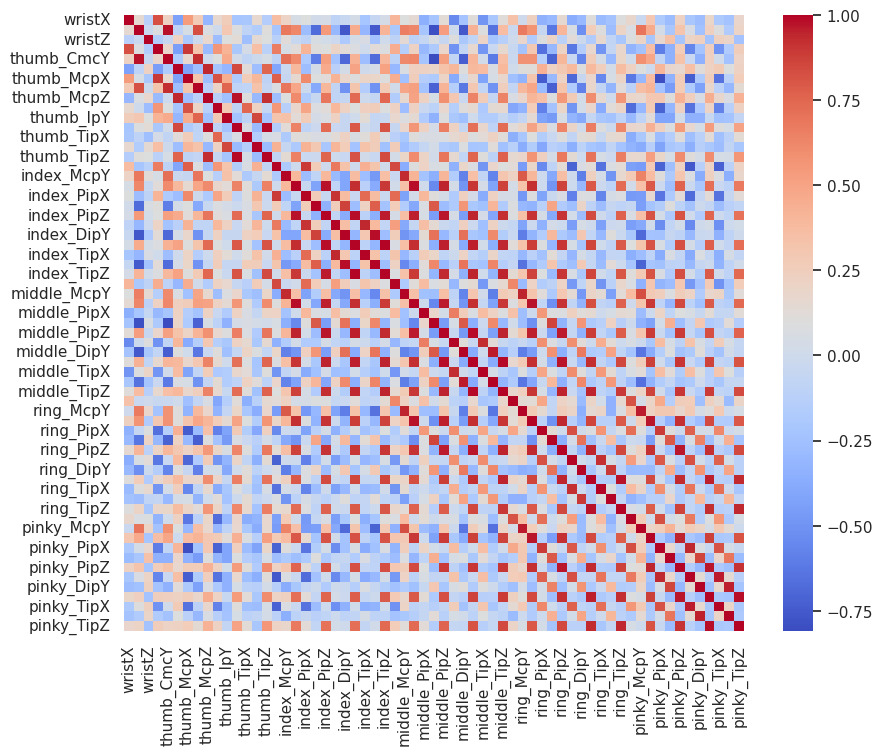

In [666]:
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap with adjusted size
sns.heatmap(corr_matrix, cmap='coolwarm')

# Display the plot
plt.show()

In [667]:
#transform the letters to numbers
df.dtypes
df["class_type"] = pd.factorize(df["class_type"])[0]
df.dtypes
df

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
14657,0,180.357227,378.771820,-1.791660e-06,272.292194,359.724884,-0.149891,351.171970,281.426620,-0.236552,...,-0.203806,106.384549,319.862213,-0.254220,119.020193,373.328171,-0.225167,125.231738,365.512543,-0.191373
1117,0,363.639050,132.554512,9.217420e-07,316.109447,146.283531,-0.075681,281.904631,186.599960,-0.114267,...,-0.058743,375.063572,222.863407,-0.082261,353.266411,233.577156,-0.080605,333.479061,235.364838,-0.077130
5722,0,172.377205,512.499008,-1.484397e-06,258.268461,497.410355,-0.071060,335.384760,396.448898,-0.089022,...,-0.054639,146.332026,241.115799,-0.137263,149.400473,312.187462,-0.109404,145.030103,351.981506,-0.061245
5723,0,173.088827,511.299210,-1.454141e-06,262.808189,494.667625,-0.066343,341.112070,394.877548,-0.082833,...,-0.055738,145.859313,240.557995,-0.137959,149.145427,311.317520,-0.110106,145.499697,352.094421,-0.061525
5724,0,170.326881,504.926262,-1.271190e-06,256.703310,500.227165,-0.071052,334.990168,405.668831,-0.086748,...,-0.047261,143.985472,245.856037,-0.127769,147.865076,314.067860,-0.099965,146.252260,353.113632,-0.053415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,23,144.287195,590.172577,2.013193e-06,92.261925,489.358292,-0.026369,94.095297,373.474274,-0.085719,...,-0.274336,349.508543,382.363663,-0.301813,383.105536,323.964195,-0.287217,405.704956,276.912231,-0.273295
8492,23,118.335593,549.733658,1.921811e-06,81.365690,449.843140,-0.036861,104.357414,338.722801,-0.096028,...,-0.270973,346.179256,395.855179,-0.300888,383.990765,337.026749,-0.288647,408.158970,290.530186,-0.275386
8491,23,219.580078,351.537132,-2.973024e-07,198.411012,280.903931,-0.069852,216.167779,221.355762,-0.165629,...,-0.397805,308.702316,438.631401,-0.474001,295.976543,446.606064,-0.440972,277.831650,449.637146,-0.411833
10597,23,312.917576,571.042099,2.243176e-06,209.432302,517.344666,-0.081879,139.771986,404.285240,-0.178869,...,-0.372373,369.848843,298.464546,-0.439700,355.222778,223.102818,-0.445233,340.182438,167.075348,-0.442971


In [668]:
X = df.iloc[:, 1:]
X

,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,thumb_IpX,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
14657,180.357227,378.771820,-1.791660e-06,272.292194,359.724884,-0.149891,351.171970,281.426620,-0.236552,412.909126,...,-0.203806,106.384549,319.862213,-0.254220,119.020193,373.328171,-0.225167,125.231738,365.512543,-0.191373
1117,363.639050,132.554512,9.217420e-07,316.109447,146.283531,-0.075681,281.904631,186.599960,-0.114267,258.639994,...,-0.058743,375.063572,222.863407,-0.082261,353.266411,233.577156,-0.080605,333.479061,235.364838,-0.077130
5722,172.377205,512.499008,-1.484397e-06,258.268461,497.410355,-0.071060,335.384760,396.448898,-0.089022,380.239420,...,-0.054639,146.332026,241.115799,-0.137263,149.400473,312.187462,-0.109404,145.030103,351.981506,-0.061245
5723,173.088827,511.299210,-1.454141e-06,262.808189,494.667625,-0.066343,341.112070,394.877548,-0.082833,384.540997,...,-0.055738,145.859313,240.557995,-0.137959,149.145427,311.317520,-0.110106,145.499697,352.094421,-0.061525
5724,170.326881,504.926262,-1.271190e-06,256.703310,500.227165,-0.071052,334.990168,405.668831,-0.086748,379.621267,...,-0.047261,143.985472,245.856037,-0.127769,147.865076,314.067860,-0.099965,146.252260,353.113632,-0.053415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,144.287195,590.172577,2.013193e-06,92.261925,489.358292,-0.026369,94.095297,373.474274,-0.085719,149.834132,...,-0.274336,349.508543,382.363663,-0.301813,383.105536,323.964195,-0.287217,405.704956,276.912231,-0.273295
8492,118.335593,549.733658,1.921811e-06,81.365690,449.843140,-0.036861,104.357414,338.722801,-0.096028,168.856716,...,-0.270973,346.179256,395.855179,-0.300888,383.990765,337.026749,-0.288647,408.158970,290.530186,-0.275386
8491,219.580078,351.537132,-2.973024e-07,198.411012,280.903931,-0.069852,216.167779,221.355762,-0.165629,263.705950,...,-0.397805,308.702316,438.631401,-0.474001,295.976543,446.606064,-0.440972,277.831650,449.637146,-0.411833
10597,312.917576,571.042099,2.243176e-06,209.432302,517.344666,-0.081879,139.771986,404.285240,-0.178869,151.533480,...,-0.372373,369.848843,298.464546,-0.439700,355.222778,223.102818,-0.445233,340.182438,167.075348,-0.442971


In [669]:
# Find the maximum value
max_value = tf.reduce_max(X)

# Print the maximum value
print("Maximum value:", max_value)

Maximum value: tf.Tensor(838.8401794433594, shape=(), dtype=float64)


In [670]:
#find the minimum value
min_value = tf.reduce_min(X)

print("Maximum value:", min_value)

Maximum value: tf.Tensor(-133.792462348938, shape=(), dtype=float64)


In [671]:
y = df.iloc[:, 0]
y

14657     0
1117      0
5722      0
5723      0
5724      0
         ..
8493     23
8492     23
8491     23
10597    23
8470     23
Name: class_type, Length: 14658, dtype: int64

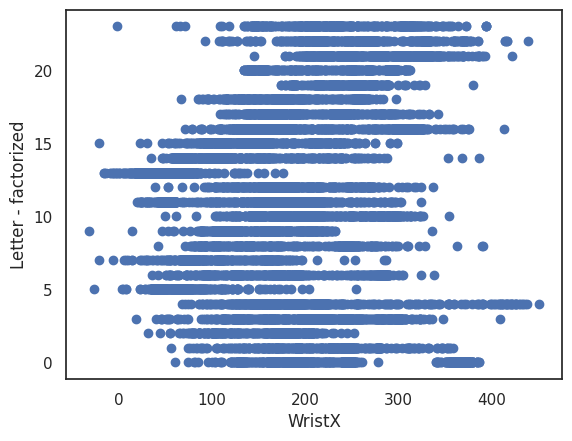

In [672]:
#visualize with a plot
plt.scatter(X.iloc[:, 0], y)

plt.xlabel('WristX')
plt.ylabel('Letter - factorized')

plt.show()

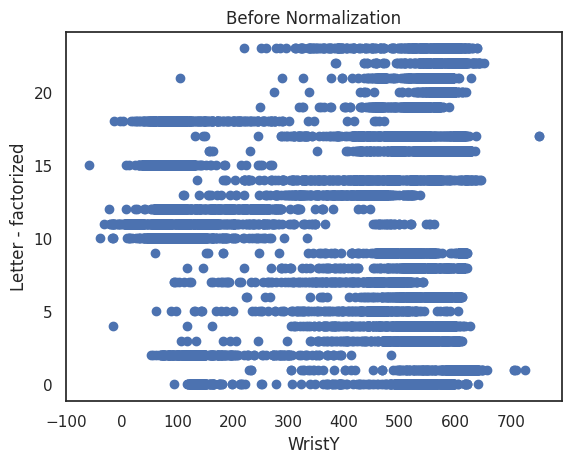

In [673]:
plt.scatter(X.iloc[:, 1], y)

plt.title("Before Normalization")
plt.xlabel('WristY')
plt.ylabel('Letter - factorized')

plt.show()

In [674]:
len(X)

14658

## Normalization

In [675]:
# Split the dataset into training and testing sets with 80% and 20% ratio respectively, ensuring that the class column is stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
y_train

464      15
13536     0
577      11
2647     11
7613     23
         ..
7600     21
7830     18
5229     18
9542     17
9198      4
Name: class_type, Length: 11726, dtype: int64

In [676]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


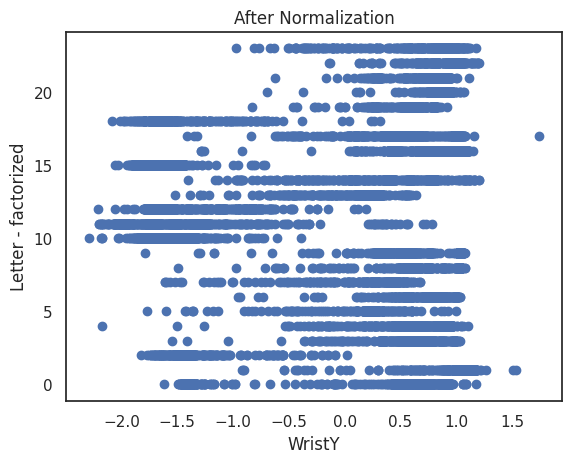

In [677]:
df_X_train = pd.DataFrame(X_train)


plt.scatter(df_X_train.iloc[:, 1], y_train)

plt.title("After Normalization")
plt.xlabel('WristY')
plt.ylabel('Letter - factorized')

plt.show()

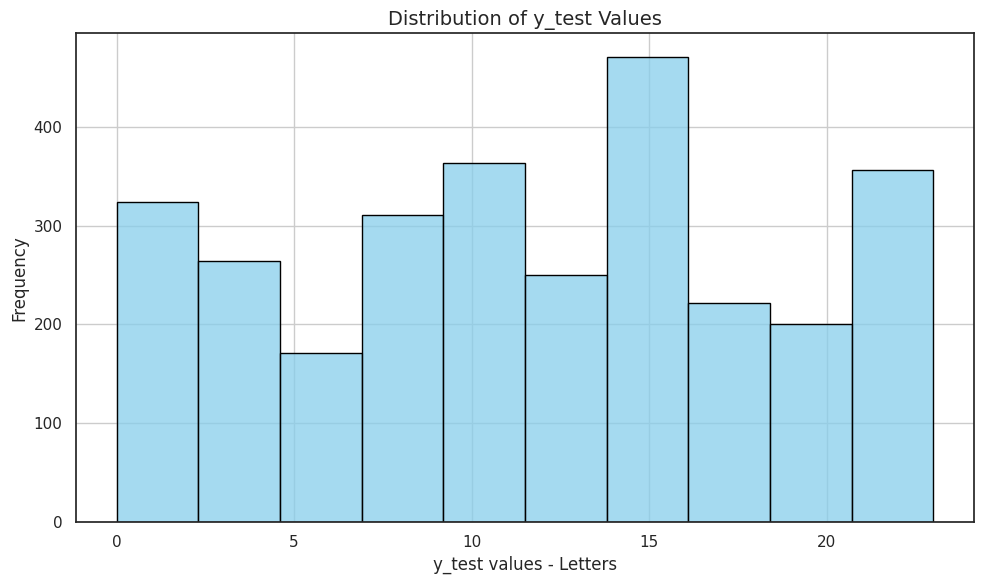

In [678]:
# Assuming y_test is a list of numerical values
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
sns.histplot(y_test, bins=10, kde=False, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as desired
plt.xlabel('y_test values - Letters', fontsize=12)  # Adjust the font size as desired
plt.ylabel('Frequency', fontsize=12)  # Adjust the font size as desired
plt.title('Distribution of y_test Values', fontsize=14)  # Adjust the font size as desired
plt.grid(True)  # Add a grid to the plot
plt.tight_layout()  # Improve the spacing between elements
plt.show()

In [679]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
df = pd.DataFrame(X_test)
df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,1.047318,-1.594961,-1.301587,1.456917,-1.421528,-1.077465,1.273793,-0.958168,-0.889083,0.696436,...,-0.035295,-0.413162,0.579958,0.148165,-0.151496,0.308049,0.252863,-0.145997,-0.119117,0.221945
1,0.146831,0.950622,0.310024,0.793092,1.021489,-0.332136,0.988384,1.082473,0.173875,0.214424,...,1.322090,-0.780201,-0.300484,1.519240,-0.960179,-0.687409,1.390739,-1.033825,-0.838095,1.121202
2,0.310321,-1.696778,1.311528,0.629557,-1.459175,-1.176895,0.635990,-0.881414,-1.756851,0.360824,...,-2.423323,-0.690325,0.783483,-2.596720,-0.587118,0.397773,-2.277076,-0.618217,-0.275287,-1.907290
3,-1.639168,0.463896,-0.689822,-2.536754,-0.143818,0.765457,-2.116792,-0.981416,1.192005,-1.127130,...,2.224681,1.924006,1.296558,2.736051,2.065550,0.591311,2.668118,2.159836,0.245197,2.382068
4,0.801553,0.915462,-1.025726,1.136839,0.952156,-0.088987,1.275521,0.641397,0.382215,0.786415,...,1.671844,-0.803925,-1.283902,1.736517,-0.345423,-1.120442,1.477758,0.004588,-0.474491,1.217747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,-0.316826,0.363824,-0.508074,-0.048297,0.388376,-0.444624,0.103972,0.412771,-0.798211,0.619942,...,-0.578018,-0.931655,-0.874246,-0.687819,-0.504890,-0.819633,-0.951745,-0.151272,-0.432785,-1.098142
2928,-0.337543,-1.662335,1.360466,0.242812,-1.520557,-0.342653,0.266796,-0.834491,-0.920686,-0.460448,...,-2.146632,-0.548227,0.217603,-1.942474,-0.565688,-0.358677,-1.395661,-0.745001,-0.803805,-0.999480
2929,2.451751,-1.319485,-0.213604,0.858595,-1.436065,0.041678,-0.195305,-1.640114,0.340160,-0.621108,...,1.506771,2.921882,-1.496887,1.921854,2.393856,-1.313070,1.864051,1.991753,-1.120281,1.634727
2930,2.002003,0.490036,0.508893,1.662731,0.468879,-0.549269,1.020523,0.272737,-0.355419,-0.162838,...,0.530970,-0.959644,-0.176542,0.528260,-0.698500,-0.239288,0.514464,-0.240720,0.020266,0.487289


# Training

## Multi-Layer Perceptron 

In [680]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(63,)), # Add a Flatten layer to ensure that the input shape is known
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(24, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model.fit(X_train,
                               y_train,
                            batch_size = 961,
                               epochs=28, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(X_test, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/28
13/13 [==============================] - 1s 24ms/step - loss: 3.1493 - accuracy: 0.0571 - val_loss: 2.9452 - val_accuracy: 0.1078 - lr: 0.0010
Epoch 2/28
13/13 [==============================] - 0s 16ms/step - loss: 2.8131 - accuracy: 0.1953 - val_loss: 2.6215 - val_accuracy: 0.2988 - lr: 0.0011
Epoch 3/28
13/13 [==============================] - 0s 11ms/step - loss: 2.4706 - accuracy: 0.3532 - val_loss: 2.2287 - val_accuracy: 0.4444 - lr: 0.0013
Epoch 4/28
13/13 [==============================] - 0s 8ms/step - loss: 2.0479 - accuracy: 0.5040 - val_loss: 1.7505 - val_accuracy: 0.6105 - lr: 0.0014
Epoch 5/28
13/13 [==============================] - 0s 9ms/step - loss: 1.5623 - accuracy: 0.6493 - val_loss: 1.2706 - val_accuracy: 0.7149 - lr: 0.0016
Epoch 6/28
13/13 [==============================] - 0s 8ms/step - loss: 1.1333 - accuracy: 0.7369 - val_loss: 0.9143 - val_accuracy: 0.8012 - lr: 0.0018
Epoch 7/28
13/13 [==============================] - 0s 7ms/step - loss: 0.8184 

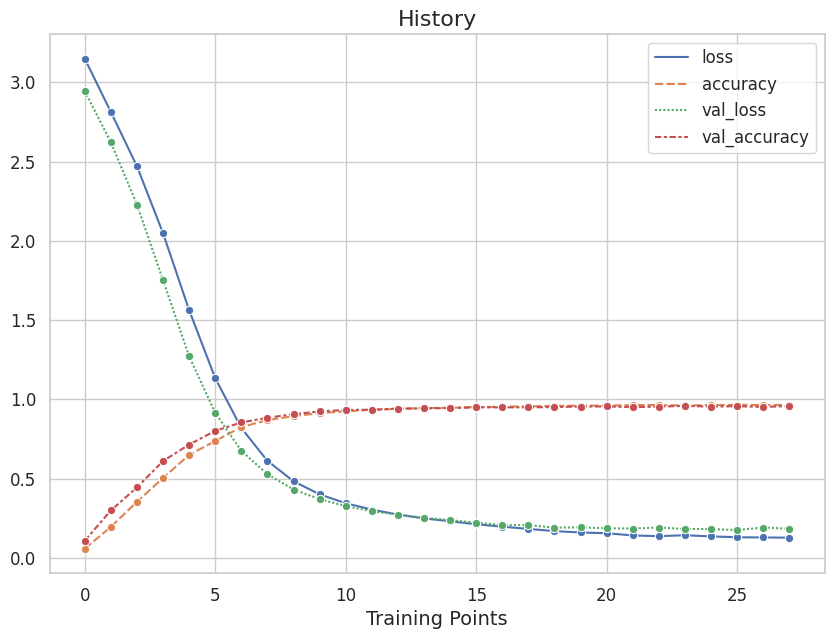

In [681]:
# Set seaborn style
sns.set(style='whitegrid')


find_lr_history = pd.DataFrame(find_lr_history.history)
columns_to_plot = ['loss', 'accuracy', 'val_loss','val_accuracy']
# Plot the DataFrame using seaborn
plt.figure(figsize=(10, 7))
sns.lineplot(data=find_lr_history[columns_to_plot], marker='o')
plt.xlabel('Training Points', fontsize=14)
plt.title('History', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [682]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 63)                0         
                                                                 
 dense_51 (Dense)            (None, 32)                2048      
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dense_53 (Dense)            (None, 24)                792       
                                                                 
Total params: 3,896
Trainable params: 3,896
Non-trainable params: 0
_________________________________________________________________


### Save Model

In [683]:
#Saving the model 
model.save("/content/gdrive/MyDrive/διπλωματική/save_trained_mlp_model")

In [684]:
# Hard Encode for the Prediction
classes = {
    'α': 0,
    'β': 1,
    'γ': 2,
    'δ': 3,
    'ε': 4,
    'ζ': 5,
    'η': 6,
    'θ': 7,
    'ι': 8,
    'κ': 9,
    'λ': 10,
    'μ': 11,
    'ν': 12,
    'ξ': 13,
    'ο': 14,
    'π': 15,
    'ρ': 16,
    'σ': 17,
    'τ': 18,
    'υ': 19,
    'φ': 20,
    'χ': 21,
    'ψ': 22,
    'ω': 23,
}

In [685]:
# Make predictions with the most recent model
y_probs = model.predict(X_test) 

print(y_probs.shape)

92/92 [==============================] - 0s 3ms/step
(2932, 24)


### Confusion Matrix

In [686]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [687]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix

print(y_test.shape)
confusion_matrix(y_test, y_probs.argmax(axis=1))

(2932,)


array([[150,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0],
       [  0,  81,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   1,   0,   3,   0],
       [  0,   0,  77,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1, 140,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   5,   0,   1,   1,   0,   0,   0,   0,   2,   0],
       [  0,   2,   0,   0, 106,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,  64,   0,   1,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   1,   0,  97,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   1,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   2,   0

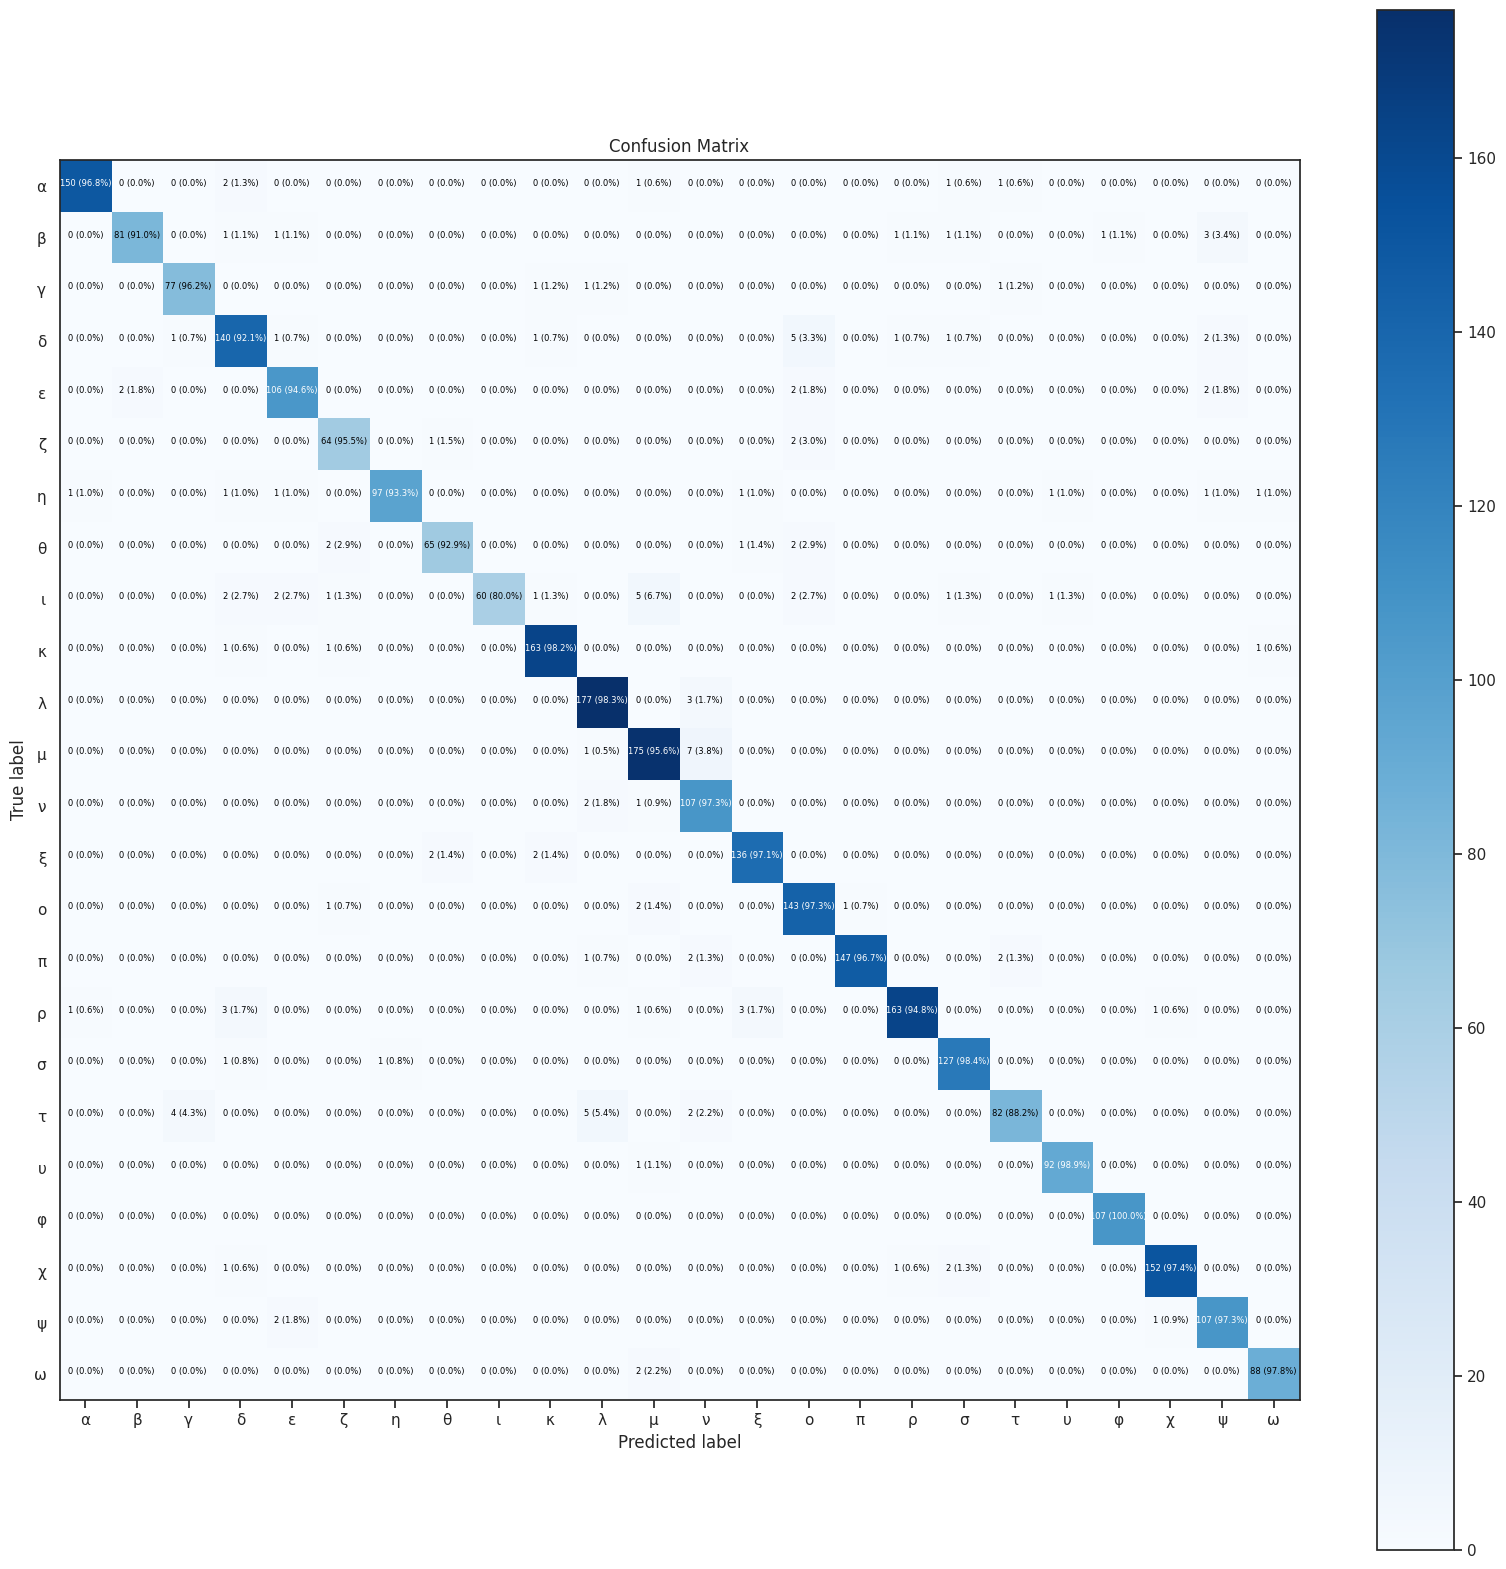

In [688]:
# Make a prettier confusion matrix
sns.set_style(style='white')
make_confusion_matrix(y_test, y_probs.argmax(axis=1),
                      classes,
                      figsize=(20, 20),
                      text_size=6)

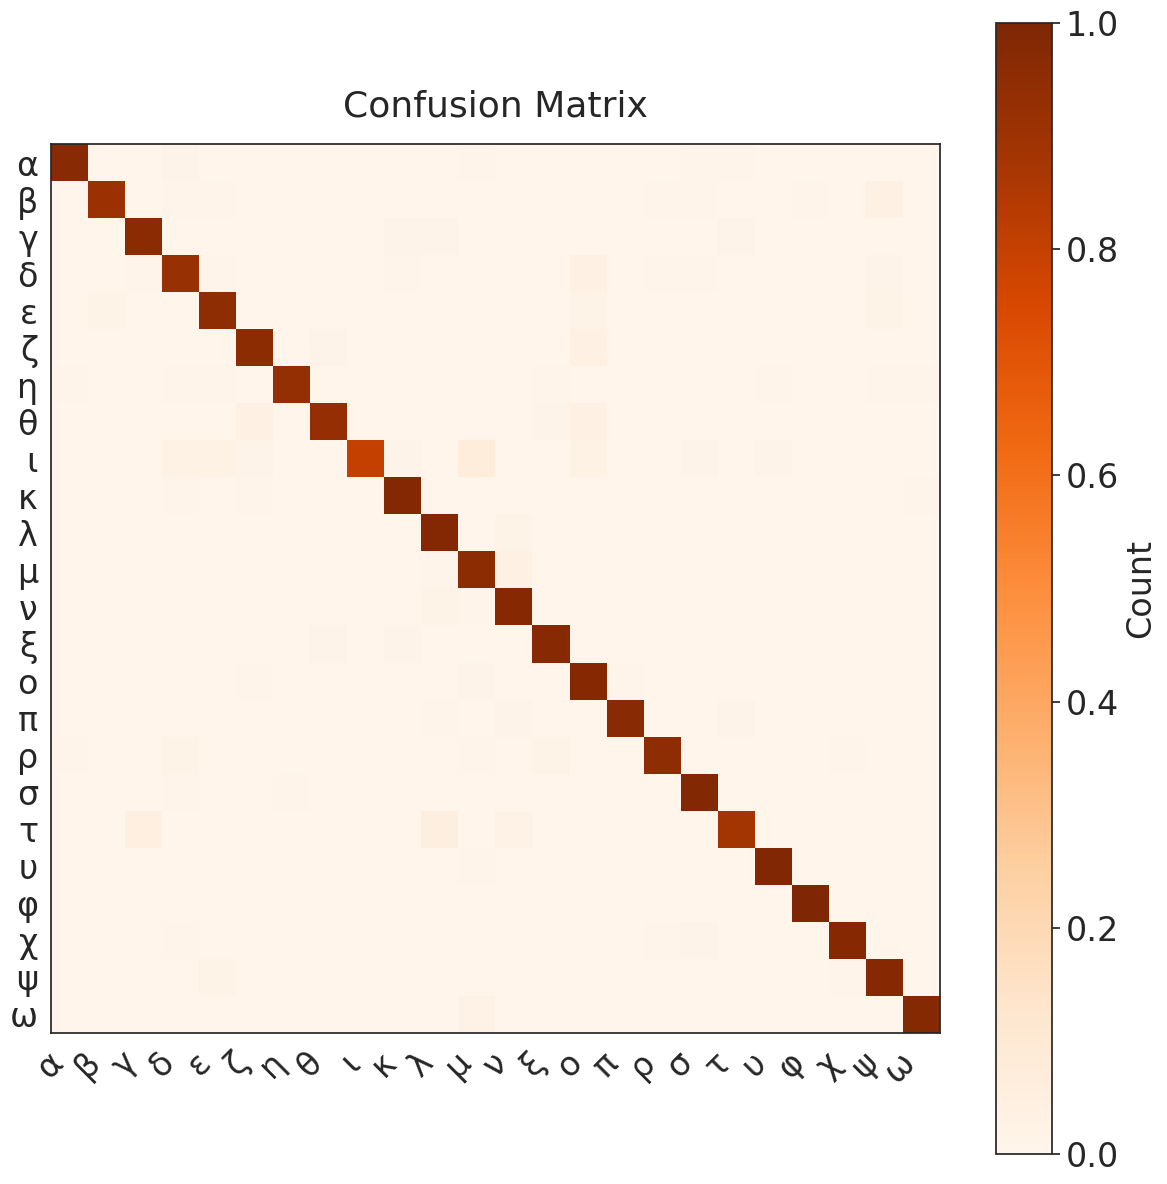

In [689]:
import matplotlib.pyplot as plt
import numpy as np

def make_confusion_matrix_2(y_true, y_pred, classes, figsize=(10, 10), color='PuBu', text_size=24):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm, copy=True)

    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Define the color map
    cmap = plt.get_cmap(color)

    # Plot confusion matrix as colored squares
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)

    # Set labels and ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes)

    # Rotate the xticks labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=text_size)
    
    # Increase the size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=text_size)
    
    # Remove the axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove the numbers from the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, '', ha='center', va='center', color='black', fontsize=text_size)

    # Set plot title
    ax.set_title('Confusion Matrix', fontsize=text_size+2, pad=20)

    # Add colorbar on the right side
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=text_size)
    
    # Set label for colorbar
    cbar.set_label('Count', rotation=90, fontsize=text_size)

    # Set plot tight layout
    fig.tight_layout()

    # Show plot
    plt.show()

make_confusion_matrix_2(y_test, y_probs.argmax(axis=1),
                      classes,
                      figsize=(12, 12),
                      color='Oranges',
                      text_size=24)

In [690]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_probs.argmax(axis=1))
accuracy

0.9570259208731241

In [691]:
# Calculate precision
precision = precision_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
precision

0.9580166777183916

In [692]:
# Calculate recall
recall = recall_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
recall

0.9570259208731241

In [693]:
# Calculate F1 score
f1 = f1_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
f1

0.9568947911177702

### Area Under Curve

92/92 [==============================] - 0s 2ms/step


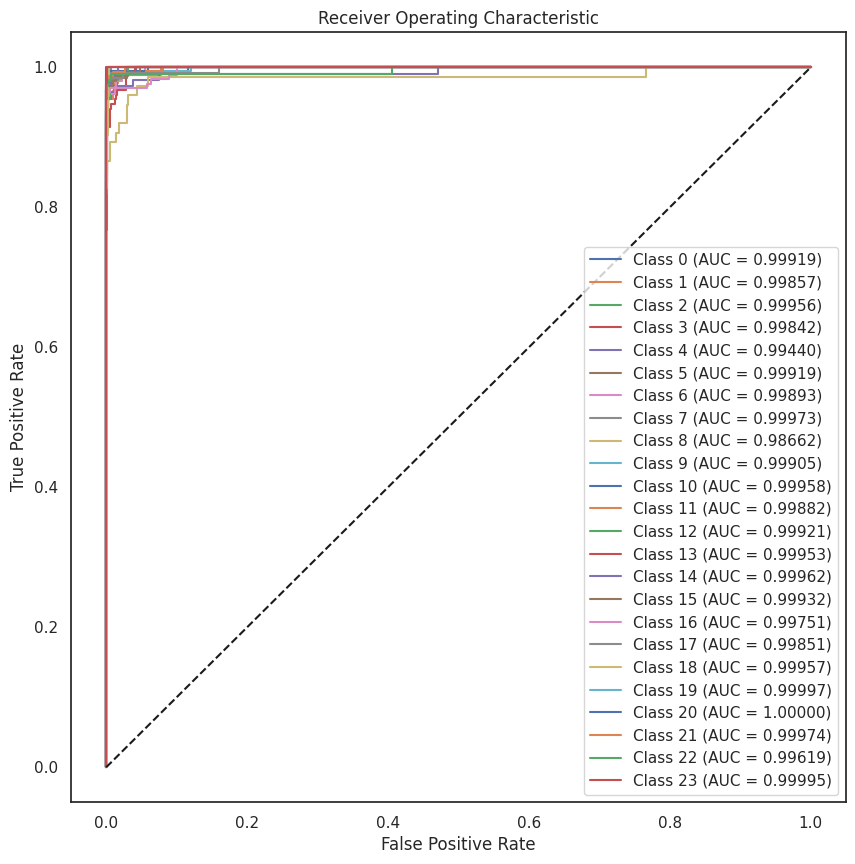

In [694]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes =24

# Get the predicted probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert y_test to one-hot encoded array
y_test_one_hot = label_binarize(y_test, classes=range(n_classes))

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for each class
fpr = {}
tpr = {}
thresholds = {}
auc_scores = {}

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    auc_scores[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 10))  # Adjust the dimensions as needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc_scores[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Logarithmic Loss

In [695]:
# Evaluate the logarithmic loss on the test set
loss = model.evaluate(X_test, y_test, verbose=0)

print("Logarithmic Loss:", loss[0])

Logarithmic Loss: 0.1835034042596817


## CNN

In [696]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Reshape((9, 7, 1), input_shape=(63,)), 
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(24, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
cnn_lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
cnn_lr_history = model_2.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=17,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

# Predict
y_pred = model_2.predict(X_test)

Epoch 1/17
367/367 [==============================] - 7s 16ms/step - loss: 1.2953 - accuracy: 0.7230 - val_loss: 0.5200 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 2/17
367/367 [==============================] - 5s 12ms/step - loss: 0.3975 - accuracy: 0.9150 - val_loss: 0.3025 - val_accuracy: 0.9366 - lr: 0.0011
Epoch 3/17
367/367 [==============================] - 3s 8ms/step - loss: 0.2730 - accuracy: 0.9365 - val_loss: 0.2521 - val_accuracy: 0.9454 - lr: 0.0013
Epoch 4/17
367/367 [==============================] - 4s 10ms/step - loss: 0.2217 - accuracy: 0.9468 - val_loss: 0.2040 - val_accuracy: 0.9540 - lr: 0.0014
Epoch 5/17
367/367 [==============================] - 4s 11ms/step - loss: 0.1873 - accuracy: 0.9546 - val_loss: 0.2011 - val_accuracy: 0.9536 - lr: 0.0016
Epoch 6/17
367/367 [==============================] - 4s 10ms/step - loss: 0.1679 - accuracy: 0.9582 - val_loss: 0.1951 - val_accuracy: 0.9533 - lr: 0.0018
Epoch 7/17
367/367 [==============================] - 3s 9ms/step

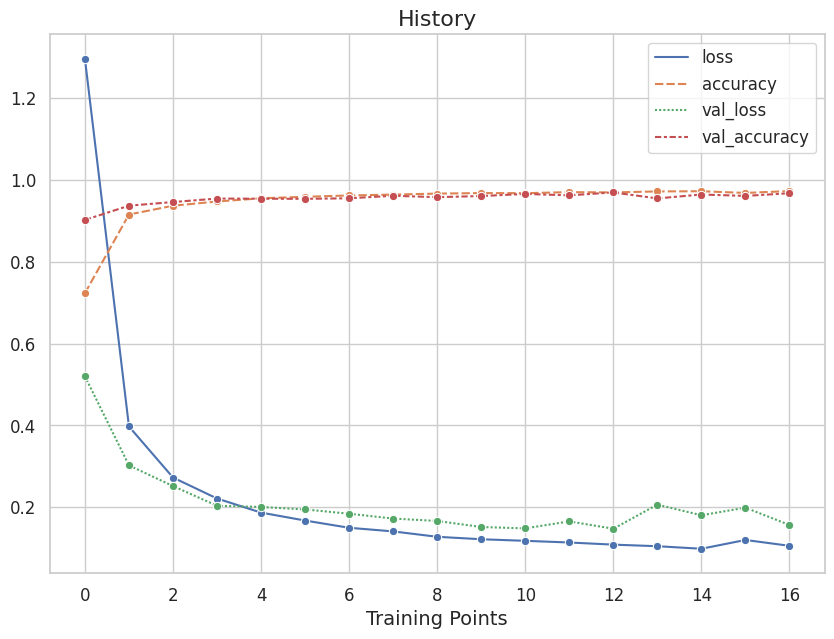

In [697]:
# Set seaborn style
sns.set(style='whitegrid')


find_lr_history = pd.DataFrame(cnn_lr_history.history)
columns_to_plot = ['loss', 'accuracy', 'val_loss','val_accuracy']
# Plot the DataFrame using seaborn
plt.figure(figsize=(10, 7))
sns.lineplot(data=find_lr_history[columns_to_plot], marker='o')
plt.xlabel('Training Points', fontsize=14)
plt.title('History', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [698]:
model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 9, 7, 1)           0         
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 7, 32)          320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_24 (Flatten)        (None, 384)               0         
                                                                 
 dense_54 (Dense)            (None, 24)                9240      
                                                                 
Total params: 9,560
Trainable params: 9,560
Non-trainable params: 0
___________________________________________________

In [699]:
print(y_pred.shape)

(2932, 24)


### Confusion Matrix

In [700]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix

print(y_test.shape)
confusion_matrix(y_test, y_pred.argmax(axis=1))

(2932,)


array([[153,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  85,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,  76,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   2,   1,   0,   0,   0,   0],
       [  0,   1,   1, 147,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0],
       [  0,   2,   0,   0, 104,   0,   0,   2,   1,   0,   0,   0,   0,
          0,   0,   0,   1,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58,   0,   4,   0,   0,   0,   0,   0,
          2,   0,   1,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0,   1,   0,   0,   0,   0,  99,   0,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

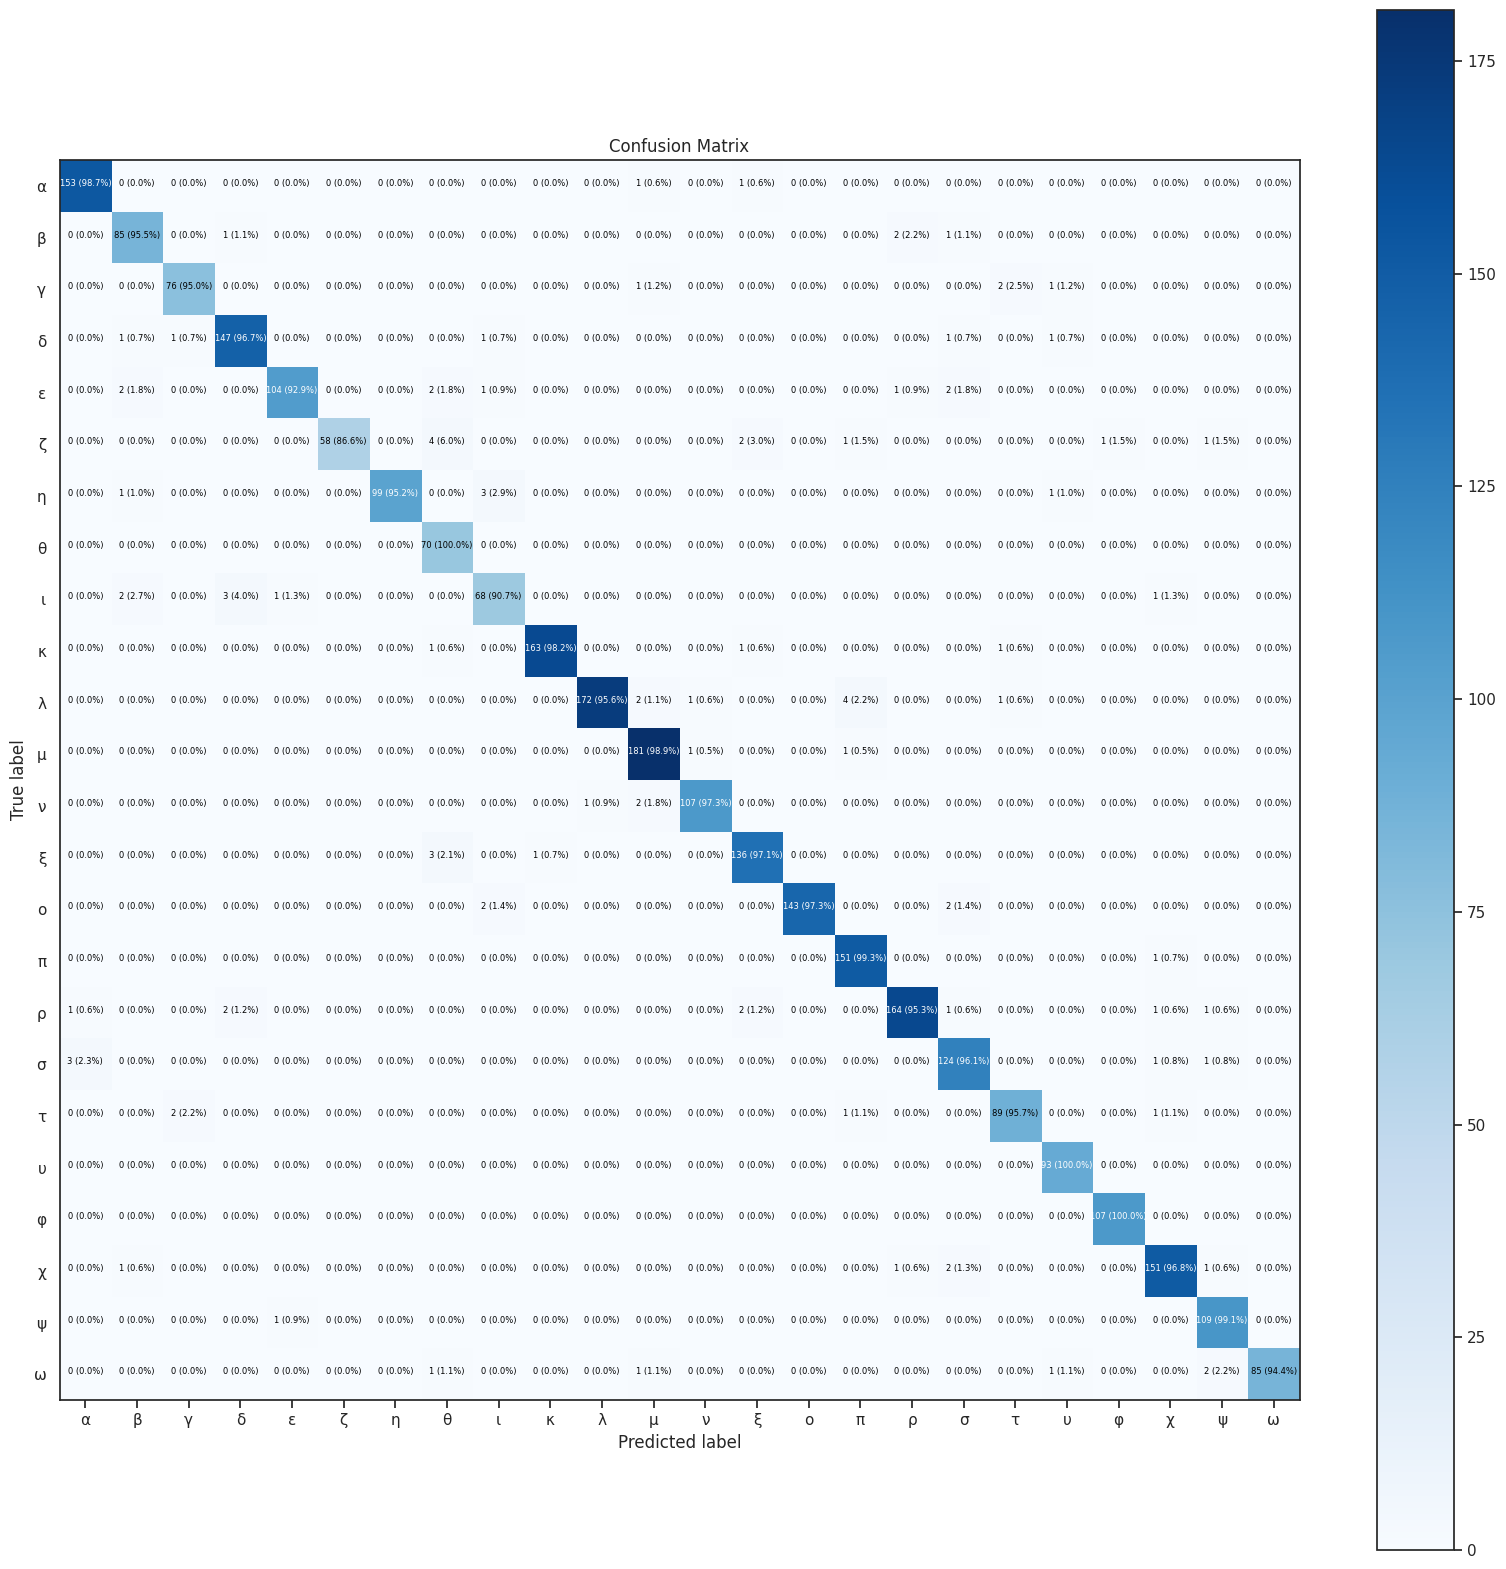

In [701]:
# Make a prettier confusion matrix
sns.set_style(style='white')

make_confusion_matrix(y_test, y_pred.argmax(axis=1),
                      classes,
                      figsize=(20, 20),
                      text_size=6)

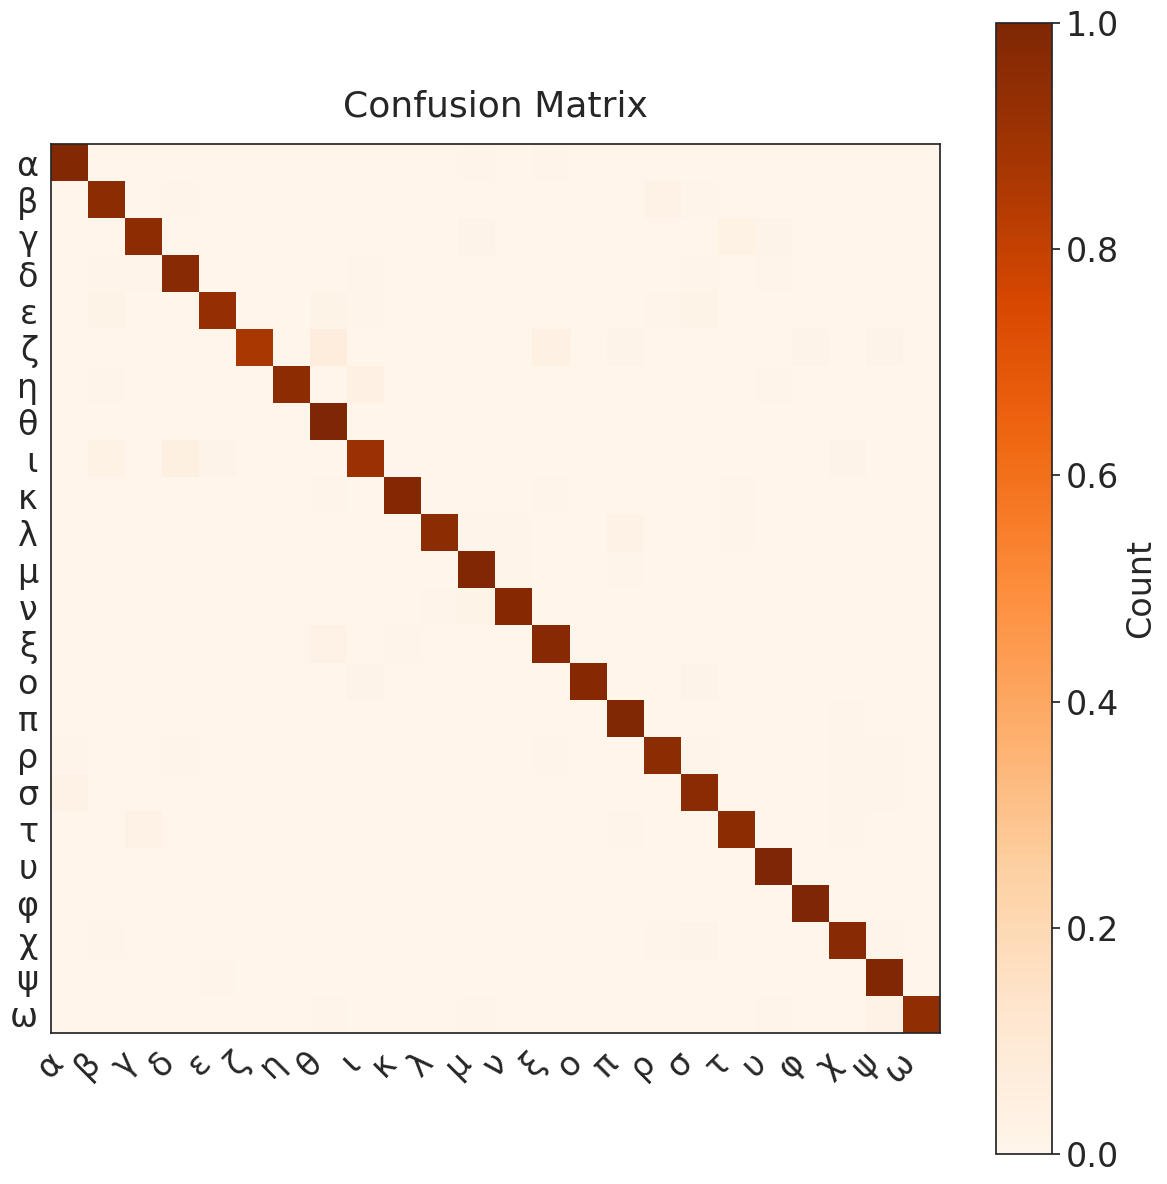

In [702]:
make_confusion_matrix_2(y_test, y_pred.argmax(axis=1),
                      classes,
                      figsize=(12, 12),
                      color='Oranges',
                      text_size=24)


In [703]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
accuracy

0.9669167803547067

In [704]:
# Calculate precision
precision = precision_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
precision

0.9580166777183916

In [705]:
# Calculate recall
recall = recall_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
recall

0.9570259208731241

In [706]:
# Calculate F1 score
f1 = f1_score(y_test, y_probs.argmax(axis=1), average='weighted', zero_division=1)
f1

0.9568947911177702

### Area Under Curve

92/92 [==============================] - 0s 2ms/step


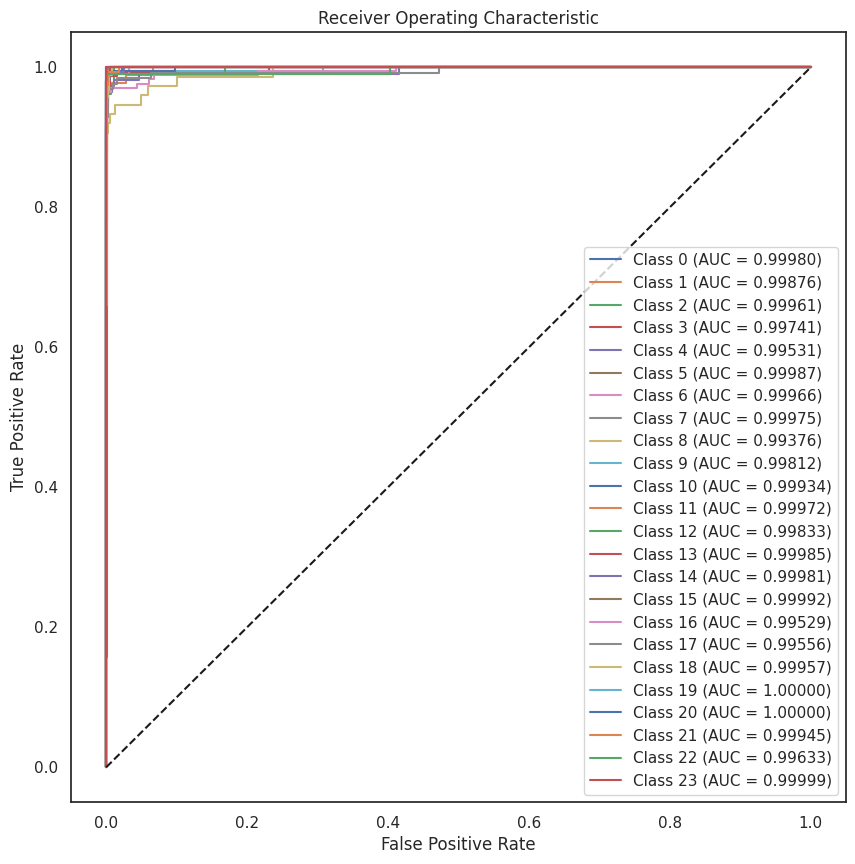

In [707]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes =24

# Get the predicted probabilities for each class
y_pred_probs = model_2.predict(X_test)

# Convert y_test to one-hot encoded array
y_test_one_hot = label_binarize(y_test, classes=range(n_classes))

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for each class
fpr = {}
tpr = {}
thresholds = {}
auc_scores = {}

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    auc_scores[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 10))  # Adjust the dimensions as needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc_scores[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Logarithmic Loss

In [708]:
# Evaluate the logarithmic loss on the test set
loss = model_2.evaluate(X_test, y_test, verbose=0)

print("Logarithmic Loss:", loss[0])

Logarithmic Loss: 0.15709280967712402


In [709]:
#Saving the model 
model_2.save("/content/gdrive/MyDrive/διπλωματική/save_trained_cnn_model")

# Words Testing

Choose a random image directory from the data and based on the images inside this folder predict the letters of the word.

In [710]:
import random

main_directory = '/content/gdrive/MyDrive/Fingerspelling_video_frames_new/'

# Get a list of all subdirectories within the main directory
subdirectories = [subdir for subdir in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, subdir))]

# Choose a random name directory
random_name_directory = random.choice(subdirectories)

#returns the letter folders
dir = main_directory + random_name_directory
letter_subdirectories = [subdir for subdir in os.listdir(dir) if os.path.isdir(os.path.join(dir, subdir))]

# Filter the subdirectories to include only the non letter directories
filtered_names = [name for name in letter_subdirectories if len(name) > 1]

# Randomly select a name from the filtered list
random_letter = random.choice(filtered_names)

folder_path = dir + '/' + random_letter

# Print the path to the randomly selected image
print("Path to random word folder:", folder_path)


Path to random word folder: /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο


In [711]:
def is_image(file_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    file_extension = os.path.splitext(file_path)[1].lower()
    return file_extension in image_extensions

## MLP Model

In [712]:
times = 0
num_columns = 63
path_list = []
num_of_photos = 0
word = ""

for image in os.scandir(folder_path):
  image_path = os.path.join(folder_path, image.name)
  #print(image_path)
  if is_image(image_path):
    path_list.append(image_path)

#print(path_list)

sorted_paths = sorted(path_list, key=lambda x: int(x.split("_")[-1][:-4]))

for path in sorted_paths:
    #print(path)

    if(times == 0):
      times = 1
      array = np.zeros((0, num_columns))
      
    print("image is: ", path)
    (wristX, wristY, wristZ,
    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
    thumb_McpX, thumb_McpY, thumb_McpZ,
    thumb_IpX, thumb_IpY, thumb_IpZ,
    thumb_TipX, thumb_TipY, thumb_TipZ,
    index_McpX, index_McpY, index_McpZ,
    index_PipX, index_PipY, index_PipZ,
    index_DipX, index_DipY, index_DipZ,
    index_TipX, index_TipY, index_TipZ,
    middle_McpX, middle_McpY, middle_McpZ,
    middle_PipX, middle_PipY, middle_PipZ,
    middle_DipX, middle_DipY, middle_DipZ,
    middle_TipX, middle_TipY, middle_TipZ,
    ring_McpX, ring_McpY, ring_McpZ,
    ring_PipX, ring_PipY, ring_PipZ,
    ring_DipX, ring_DipY, ring_DipZ,
    ring_TipX, ring_TipY, ring_TipZ,
    pinky_McpX, pinky_McpY, pinky_McpZ,
    pinky_PipX, pinky_PipY, pinky_PipZ,
    pinky_DipX, pinky_DipY, pinky_DipZ,
    pinky_TipX, pinky_TipY, pinky_TipZ,
    output_IMG) = extract_feature(path)

    #Shape the image features into an 1x3 array.
    input_IMG = np.array([[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]])
    
    #print(model.predict(input_IMG))

    #print(X_test.shape)
    
    input_IMG = np.transpose(input_IMG)
    input_IMG = scaler.transform(input_IMG)
    input_IMG = input_IMG[np.newaxis, :]
    #print(input_IMG.shape)

    
    predictions = np.argmax(model.predict(input_IMG), axis=-1)
    for alphabets, values in classes.items():
        if values == predictions[0] :
          #print(alphabets)
          word += alphabets

print("\n\n Final letters are: ", word)

image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_1.png
1/1 [==============================] - 0s 103ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_2.png
1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_3.png
1/1 [==============================] - 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_4.png
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_5.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_6.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_7.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_8.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_9.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_10.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_11.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_12.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_13.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_14.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_15.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_16.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_17.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_18.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_19.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_20.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_21.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_22.png
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_23.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_24.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_25.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_26.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_27.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_28.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_29.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_30.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_31.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_32.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_33.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_34.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_35.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_36.png
1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_37.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_38.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_39.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_40.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_41.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_42.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_43.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_44.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_45.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_46.png
1/1 [==============================] - 0s 31ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_47.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_48.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_49.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_50.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_51.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_52.png
1/1 [==============================] - 0s 29ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_53.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_54.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_55.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_56.png
1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_57.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_58.png
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_59.png
1/1 [==============================] - 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_60.png
1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_61.png
1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_62.png
1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_63.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_64.png
1/1 [==============================] - 0s 48ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_65.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_66.png
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_67.png
1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_68.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_69.png
1/1 [==============================] - 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_70.png
1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_71.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_72.png
1/1 [==============================] - 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_73.png
1/1 [==============================] - 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_74.png
1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_75.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_76.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_77.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_78.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_79.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_80.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_81.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_82.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_83.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_84.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_85.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_86.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_87.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_88.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_89.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_90.png
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_91.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_92.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_93.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_94.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_95.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_96.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_97.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_98.png
1/1 [==============================] - 0s 29ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_99.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_100.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_101.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_102.png
1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_103.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_104.png
1/1 [==============================] - 0s 31ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_105.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_106.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_107.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_108.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_109.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_110.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_111.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_112.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_113.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_114.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_115.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_116.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_117.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_118.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_119.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_120.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_121.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_122.png
1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_123.png
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_124.png
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_125.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_126.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_127.png
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_128.png
1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_129.png
1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_130.png
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_131.png
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_132.png
1/1 [==============================] - 0s 32ms/step


 Final letters are:  ζζζζζζθθθθθθθθθθθθθθθθθθθθθθθκδδηηηηηηηηηηηηηηηηηηηηηηηδδδδρρχρρρρρρρρρρρρρρρρρρυυυιιιιιιιιιιιιιιιιεοοζζοοοοοοοοοοοοοοοοοοοοοοοομαμη


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## CNN Model

In [713]:
times = 0
num_columns = 63
path_list = []
num_of_photos = 0
word = ""

for image in os.scandir(folder_path):
  image_path = os.path.join(folder_path, image.name)
  #print(image_path)
  if is_image(image_path):
    path_list.append(image_path)

#print(path_list)

sorted_paths = sorted(path_list, key=lambda x: int(x.split("_")[-1][:-4]))

for path in sorted_paths:
    #print(path)

    if(times == 0):
      times = 1
      array = np.zeros((0, num_columns))
      
    print("image is: ", path)
    (wristX, wristY, wristZ,
    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
    thumb_McpX, thumb_McpY, thumb_McpZ,
    thumb_IpX, thumb_IpY, thumb_IpZ,
    thumb_TipX, thumb_TipY, thumb_TipZ,
    index_McpX, index_McpY, index_McpZ,
    index_PipX, index_PipY, index_PipZ,
    index_DipX, index_DipY, index_DipZ,
    index_TipX, index_TipY, index_TipZ,
    middle_McpX, middle_McpY, middle_McpZ,
    middle_PipX, middle_PipY, middle_PipZ,
    middle_DipX, middle_DipY, middle_DipZ,
    middle_TipX, middle_TipY, middle_TipZ,
    ring_McpX, ring_McpY, ring_McpZ,
    ring_PipX, ring_PipY, ring_PipZ,
    ring_DipX, ring_DipY, ring_DipZ,
    ring_TipX, ring_TipY, ring_TipZ,
    pinky_McpX, pinky_McpY, pinky_McpZ,
    pinky_PipX, pinky_PipY, pinky_PipZ,
    pinky_DipX, pinky_DipY, pinky_DipZ,
    pinky_TipX, pinky_TipY, pinky_TipZ,
    output_IMG) = extract_feature(path)

    #Shape the image features into an 1x3 array.
    input = np.array([[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]])
    
    input = np.transpose(input)

    input = scaler.transform(input)
    #print(input.shape)

    predictions = np.argmax(model_2.predict(input), axis=-1)
    #print("prediction is: ", predictions)
    for alphabets, values in classes.items():
        if values == predictions[0] :
          word += alphabets
      
          """print("alphabets is", alphabets)
          print("values is", values)"""

print("\n\n Final letters are: ", word)

image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_1.png
1/1 [==============================] - 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_2.png
1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_3.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_4.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_5.png
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_6.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_7.png
1/1 [==============================] - 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_8.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_9.png
1/1 [==============================] - 0s 29ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_10.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_11.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_12.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_13.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_14.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_15.png
1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_16.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_17.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_18.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_19.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_20.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_21.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_22.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_23.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_24.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_25.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_26.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_27.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_28.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_29.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_30.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_31.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_32.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_33.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_34.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_35.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_36.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_37.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_38.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_39.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_40.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_41.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_42.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_43.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_44.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_45.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_46.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_47.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_48.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_49.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_50.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_51.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_52.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_53.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_54.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_55.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_56.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_57.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_58.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_59.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_60.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_61.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_62.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_63.png
1/1 [==============================] - 0s 41ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_64.png
1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_65.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_66.png
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_67.png
1/1 [==============================] - 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_68.png
1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_69.png
1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_70.png
1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_71.png
1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_72.png
1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_73.png
1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_74.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_75.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_76.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_77.png
1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_78.png
1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_79.png
1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_80.png
1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_81.png
1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_82.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_83.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_84.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_85.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_86.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_87.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_88.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_89.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_90.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_91.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_92.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_93.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_94.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_95.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_96.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_97.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_98.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_99.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_100.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_101.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_102.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_103.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_104.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_105.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_106.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_107.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_108.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_109.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_110.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_111.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_112.png
1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_113.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_114.png
1/1 [==============================] - 0s 27ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_115.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_116.png
1/1 [==============================] - 0s 21ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_117.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_118.png
1/1 [==============================] - 0s 20ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_119.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_120.png
1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_121.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_122.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_123.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_124.png
1/1 [==============================] - 0s 26ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_125.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_126.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_127.png
1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_128.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_129.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_130.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_131.png
1/1 [==============================] - 0s 23ms/step
image is:  /content/gdrive/MyDrive/Fingerspelling_video_frames_new/dwra/θηριο/frame_132.png


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


 Final letters are:  σσσσσσθθθθθθθθθθθθθθθθθθθθθθθκδδιιιιιιιηηηηηηηηηηηηηηιιυααχρρχρρρρρρρρρρρρρρρρρυυυυιιιιιιιιιιιιιιιιεεοσσοοοοοοοοοοοοοοοοοοοοοοοομμμπ
